# **Import Libraries**

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Necessary Libraries for Data Preparation
import string
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Necessary Libraries for ML Models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Necessary Libraries for Accuracy Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Necessary Libraries for Deployment
import joblib

**Download NLTK resources**

In [ ]:
# download the Punkt tokenizer models
nltk.download('punkt')

# download a list of common stopwords
nltk.download('stopwords')

# download the WordNet lexical database
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Read the Data**

In [ ]:
data = pd.read_csv('Symptom2Disease.csv')

# **Understand and Clean the Data**

In [ ]:
data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been encountering a skin hasty on my ar...
1,1,Psoriasis,"My skin has been peeling, particularly on my k..."
2,2,Psoriasis,I have been encountering joint torment in my f...
3,3,Psoriasis,"There's a silver like cleaning on my skin, par..."
4,4,Psoriasis,"My nails have little marks or pits in them, an..."
...,...,...,...
3595,3595,diabetes,These strong desires and the need to urinate o...
3596,3596,diabetes,"I have trouble breathing, especially outside. ..."
3597,3597,diabetes,"I find it difficult to breathe, especially out..."
3598,3598,diabetes,I constantly sneeze and have a dry cough. My i...


In [ ]:
# Drop the 'Unnamed: 0' column
data.drop(columns = ["Unnamed: 0"], inplace = True)
data

,label,text
0,Psoriasis,I have been encountering a skin hasty on my ar...
1,Psoriasis,"My skin has been peeling, particularly on my k..."
2,Psoriasis,I have been encountering joint torment in my f...
3,Psoriasis,"There's a silver like cleaning on my skin, par..."
4,Psoriasis,"My nails have little marks or pits in them, an..."
...,...,...
3595,diabetes,These strong desires and the need to urinate o...
3596,diabetes,"I have trouble breathing, especially outside. ..."
3597,diabetes,"I find it difficult to breathe, especially out..."
3598,diabetes,I constantly sneeze and have a dry cough. My i...


In [ ]:
# Concise summary of the DataFrame's structure and content
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3600 non-null   object
 1   text    3600 non-null   object
dtypes: object(2)
memory usage: 56.4+ KB


In [ ]:
data.columns

Index(['label', 'text'], dtype='object')

In [ ]:
data.shape

(3600, 2)

In [ ]:
# Count the number of unique values in each column
data.nunique()

label      24
text     3510
dtype: int64

In [ ]:
data.value_counts().sum()

3600

In [ ]:
# Check and Count null values
data.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# Check and Count duplicated values
data.duplicated().sum()

90

In [ ]:
# Drop duplicated values
data.drop_duplicates(inplace = True)
data

,label,text
0,Psoriasis,I have been encountering a skin hasty on my ar...
1,Psoriasis,"My skin has been peeling, particularly on my k..."
2,Psoriasis,I have been encountering joint torment in my f...
3,Psoriasis,"There's a silver like cleaning on my skin, par..."
4,Psoriasis,"My nails have little marks or pits in them, an..."
...,...,...
3595,diabetes,These strong desires and the need to urinate o...
3596,diabetes,"I have trouble breathing, especially outside. ..."
3597,diabetes,"I find it difficult to breathe, especially out..."
3598,diabetes,I constantly sneeze and have a dry cough. My i...


# **Text Preprocessing--->(NLP)**

In [ ]:
def lowercase_text(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator).strip()
    return text_without_punct

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [ ]:
# Preprocessing Container function

def preprocess_text(text):
    text = lowercase_text(text)
    text = remove_punctuation(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [ ]:
# Apply Preprocessing Container function to symptoms

data['text'] = data['text'].apply(preprocess_text)

In [ ]:
# Extract and Count unique dictionary vocabs

def count_unique_vocab(count):
    unique_vocabularies = set()
    for text in count:
        words = text.split()
        for word in words:
            unique_vocabularies.add(word)
    return len(unique_vocabularies)

# Count unique dictionary vocabs
num_unique_vocabs = count_unique_vocab(data['text'])

print("Number of unique dictionary vocabs:", num_unique_vocabs)

Number of unique dictionary vocabs: 2275


# **Select the features (X) as 'text' column and target (y) as 'label' column**

In [ ]:
X = data['text']
y = data['label']

In [ ]:
X

0       encountering skin hasty arm leg middle past we...
1       skin peeling particularly knee elbow scalp pee...
2       encountering joint torment finger wrist knee t...
3       there silver like cleaning skin particularly l...
4       nail little mark pit frequently feel incendiar...
                              ...                        
3595    strong desire need urinate occur daily basis o...
3596    trouble breathing especially outside start fee...
3597    find difficult breathe especially outside heat...
3598    constantly sneeze dry cough infection dont see...
3599    dry cough sneeze lot palpitation infection don...
Name: text, Length: 3510, dtype: object

In [ ]:
y

0       Psoriasis
1       Psoriasis
2       Psoriasis
3       Psoriasis
4       Psoriasis
          ...    
3595     diabetes
3596     diabetes
3597     diabetes
3598     diabetes
3599     diabetes
Name: label, Length: 3510, dtype: object

In [ ]:
# The 'shuffle' function is used to randomly Shuffle/Rearrange the elements of a dataset
from sklearn.utils import shuffle
data = shuffle(data, random_state = 42)
data

,label,text
3282,drug reaction,monthly cycle changed ive unexpected vaginal d...
315,Typhoid,ive dealing substantial bloating constipation ...
2756,urinary tract infection,getting blood pee sometimes get nauseous peein...
603,Impetigo,rash around nose expansive ruddy bruise taken ...
879,Dengue,ive headache muscular ache aching muscle get w...
...,...,...
1136,Common Cold,sinus feel stuffy eye quite red simply lack en...
1302,Pneumonia,im trouble breathing quite uneasy throat fille...
865,Dengue,day quite challenging due significant joint pa...
3597,diabetes,find difficult breathe especially outside heat...


In [ ]:
# Charactieristics of the data
info = data.describe().round()
info

,label,text
count,3510,3510
unique,24,3508
top,drug reaction,awoke morning see horrible rash skin several b...
freq,150,2


# **Splitting the Dataset into Train set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# **Text Feature Extraction**

In [ ]:
# Text feature extraction using TF-IDF vectorizer to transform text data
tfidf_vectorizer = TfidfVectorizer(max_features=2400)

# Transforming training and testing data
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test = tfidf_vectorizer.transform(X_test).toarray()

In [ ]:
# Save TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [ ]:
# Load TF-IDF vectorizer
joblib.load("tfidf_vectorizer.joblib")

TfidfVectorizer(max_features=2400)



---



###############################################
# ***Machine Learning Models***

###############################################

# **Decision Tree Classifier**


## **Applying Grid Search to find the best model version and the best hyperparameters**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state = 42)

# Define the hyperparameters and their possible values to search
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ['sqrt', 'log2', None]
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator = dt_classifier,
                           param_grid = parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# Fit the Grid Search to the train data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model version
best_dt_classifier = grid_search.best_estimator_
print(best_dt_classifier)

# Print the best accuracy found
best_accuracy = grid_search.best_score_
print(f'Best Accuracy: {best_accuracy*100:.2f} %')


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(random_state=42)
Best Accuracy: 86.74 %


In [ ]:
best_dt_classifier = DecisionTreeClassifier(random_state=42)
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **Model Evaluation**

In [ ]:
# Calculate and Compare the Score of train data and test data

train_score = best_dt_classifier.score(X_train, y_train)
test_score = best_dt_classifier.score(X_test, y_test)

# Print the scores
print(f'Training Score: {train_score*100:.2f} %')
print(f'Testing Score: {test_score*100:.2f} %')


Training Score: 100.00 %
Testing Score: 89.52 %


In [ ]:
# Make Predictions on the train data and test data

train_predictions = best_dt_classifier.predict(X_train)
test_predictions = best_dt_classifier.predict(X_test)

In [ ]:
# Calculate and Compare the Accuracy for training and testing data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print(f'Training Accuracy: {train_accuracy*100:.2f} %')
print(f'Testing Accuracy: {test_accuracy*100:.2f} %')


Training Accuracy: 100.00 %
Testing Accuracy: 89.52 %


In [ ]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, test_predictions)

# Print the Confusion Matrix
print(cm_1)

[[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 32  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  4  0  4  0  0  0  0  1  0  2  1  0  1  2  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  1 26  0  0  1  0  0  1  2  0  4  1  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  2  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  2  0 35  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  3  0  0  0  1  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0

In [ ]:
print(f"The Accuracy = {accuracy_score(y_test, test_predictions)*100:.2f} %")

The Accuracy = 89.52 %


In [ ]:
print(classification_report(y_test, test_predictions))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        36
                      Arthritis       1.00      1.00      1.00        39
               Bronchial Asthma       0.97      0.97      0.97        31
           Cervical spondylosis       1.00      0.89      0.94        36
                    Chicken pox       0.62      0.63      0.63        41
                    Common Cold       0.95      1.00      0.97        38
                         Dengue       0.74      0.60      0.67        43
          Dimorphic Hemorrhoids       0.94      0.89      0.92        38
               Fungal infection       0.81      0.88      0.84        40
                   Hypertension       0.97      0.94      0.95        32
                       Impetigo       0.97      0.88      0.92        34
                       Jaundice       1.00      1.00      1.00        34
                        Malaria       0.97      1.

## **Model Validation**

In [ ]:
# Validation Test #

# text_before = "The skin around my mouth, nose, and eyes is ruddy and kindled. It is regularly bothersome and awkward. There's a recognizable aggravation in my nails."

text_before = "The abdominal pain has been coming and going, and it's been really unpleasant. It's been accompanied by constipation and vomiting. I feel really concerned about my health."

# Cleaning
text_after = preprocess_text(text_before)

print(text_before)
print(text_after)

# Vectorization
tfidf_vectorizer

text_after = tfidf_vectorizer.transform([text_after]).toarray()

print(text_after.reshape(-1,1))

# Prediction
disease = best_dt_classifier.predict(text_after)

print(disease)

The abdominal pain has been coming and going, and it's been really unpleasant. It's been accompanied by constipation and vomiting. I feel really concerned about my health.
abdominal pain coming going really unpleasant accompanied constipation vomiting feel really concerned health
[[0.        ]
 [0.30370294]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
['Typhoid']


# **Random Forest Classifier**

Random Forest is an ensemble learning algorithm,
It works by constructing multiple decision trees.

## **Applying Grid Search to find the best model version and the best hyperparameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(random_state = 42)

# Define the hyperparameters and their possible values to search
parameters = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ['sqrt', 'log2', None]
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator = rf_classifier,
                           param_grid = parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# Fit the Grid Search to the train data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model version
best_rf_classifier = grid_search.best_estimator_
print(best_rf_classifier)

# Get the best accuracy found
best_accuracy = grid_search.best_score_
print(f'Best Accuracy: {best_accuracy*100:.2f} %')


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=42)
Best Accuracy: 97.68 %


In [ ]:
best_rf_classifier = RandomForestClassifier(criterion='entropy', max_features='log2', random_state=42)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

## **Model Evaluation**

In [ ]:
# Calculate and Compare the Score of train data and test data

train_score = best_rf_classifier.score(X_train, y_train)
test_score = best_rf_classifier.score(X_test, y_test)

# Print the scores
print(f'Training Score: {train_score*100:.2f} %')
print(f'Testing Score: {test_score*100:.2f} %')


Training Score: 100.00 %
Testing Score: 98.06 %


In [ ]:
# Make Predictions on the train data and test data

train_predictions = best_rf_classifier.predict(X_train)
test_predictions = best_rf_classifier.predict(X_test)

In [ ]:
# Calculate and Compare the Accuracy for training and testing data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print(f'Training Accuracy: {train_accuracy*100:.2f} %')
print(f'Testing Accuracy: {test_accuracy*100:.2f} %')


Training Accuracy: 100.00 %
Testing Accuracy: 98.06 %


In [ ]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_2 = confusion_matrix(y_test, test_predictions)

# Print the Confusion Matrix
print(cm_2)

[[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  2  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  1  0]
 [ 0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0 38  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

In [ ]:
print(f"The Accuracy = {accuracy_score(y_test, test_predictions)*100:.2f} %")

The Accuracy = 98.06 %


In [ ]:
print(classification_report(y_test, test_predictions))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        36
                      Arthritis       1.00      1.00      1.00        39
               Bronchial Asthma       0.94      1.00      0.97        31
           Cervical spondylosis       0.97      1.00      0.99        36
                    Chicken pox       0.95      0.85      0.90        41
                    Common Cold       1.00      1.00      1.00        38
                         Dengue       0.93      0.88      0.90        43
          Dimorphic Hemorrhoids       1.00      1.00      1.00        38
               Fungal infection       1.00      1.00      1.00        40
                   Hypertension       0.94      1.00      0.97        32
                       Impetigo       1.00      1.00      1.00        34
                       Jaundice       1.00      1.00      1.00        34
                        Malaria       0.97      1.

## **Model Validation**

In [ ]:
# Validation Test #

# text_before = "The skin around my mouth, nose, and eyes is ruddy and kindled. It is regularly bothersome and awkward. There's a recognizable aggravation in my nails."

text_before = "The abdominal pain has been coming and going, and it's been really unpleasant. It's been accompanied by constipation and vomiting. I feel really concerned about my health."

# Cleaning
text_after = preprocess_text(text_before)

print(text_before)
print(text_after)

# Vectorization
tfidf_vectorizer

text_after = tfidf_vectorizer.transform([text_after]).toarray()

print(text_after.reshape(-1,1))

# Prediction
disease = best_rf_classifier.predict(text_after)

print(disease)

The abdominal pain has been coming and going, and it's been really unpleasant. It's been accompanied by constipation and vomiting. I feel really concerned about my health.
abdominal pain coming going really unpleasant accompanied constipation vomiting feel really concerned health
[[0.        ]
 [0.30370294]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
['Typhoid']


# **Support Vector Machine (SVM)**

Its primary purpose is to find a hyperplane that best separates data points into different classes.

## **Applying Grid Search to find the best model version and the best hyperparameters**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a Support Vector Machine Classifier object
svm_classifier = SVC(random_state = 42)

# Define the hyperparameters and their possible values to search
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1],'kernel': ['rbf'], 'gamma': ['scale', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]

# Create the Grid Search object
grid_search = GridSearchCV(estimator = svm_classifier,
                           param_grid = parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# Fit the Grid Search to the train data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model version
best_svm_classifier = grid_search.best_estimator_
print(best_svm_classifier)

# Print the best accuracy found
best_accuracy = grid_search.best_score_
print(f'Best Accuracy: {best_accuracy*100:.2f} %')


Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear', random_state=42)
Best Accuracy: 98.67 %


In [ ]:
best_svm_classifier = SVC(C=1, kernel='linear', random_state=42, probability=True)
best_svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=42)

In [ ]:
# Save pretrained Model
joblib.dump(best_svm_classifier, "best_svm_classifier.joblib")

['best_svm_classifier.joblib']

In [ ]:
# Load pretrained Model
joblib.load("best_svm_classifier.joblib")

SVC(C=1, kernel='linear', probability=True, random_state=42)

## **Model Evaluation**

In [ ]:
# Calculate and Compare the Score of train data and test data

train_score = best_svm_classifier.score(X_train, y_train)
test_score = best_svm_classifier.score(X_test, y_test)

# Print the scores
print(f'Training Score: {train_score*100:.2f} %')
print(f'Testing Score: {test_score*100:.2f} %')


Training Score: 100.00 %
Testing Score: 99.43 %


In [ ]:
# Make Predictions on the train data and test data

train_predictions = best_svm_classifier.predict(X_train)
test_predictions = best_svm_classifier.predict(X_test)

In [ ]:
# Calculate and Compare the Accuracy for training and testing data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print(f'Training Accuracy: {train_accuracy*100:.2f} %')
print(f'Testing Accuracy: {test_accuracy*100:.2f} %')


Training Accuracy: 100.00 %
Testing Accuracy: 99.43 %


In [ ]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_3 = confusion_matrix(y_test, test_predictions)

# Print the Confusion Matrix
print(cm_3)

[[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  1  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

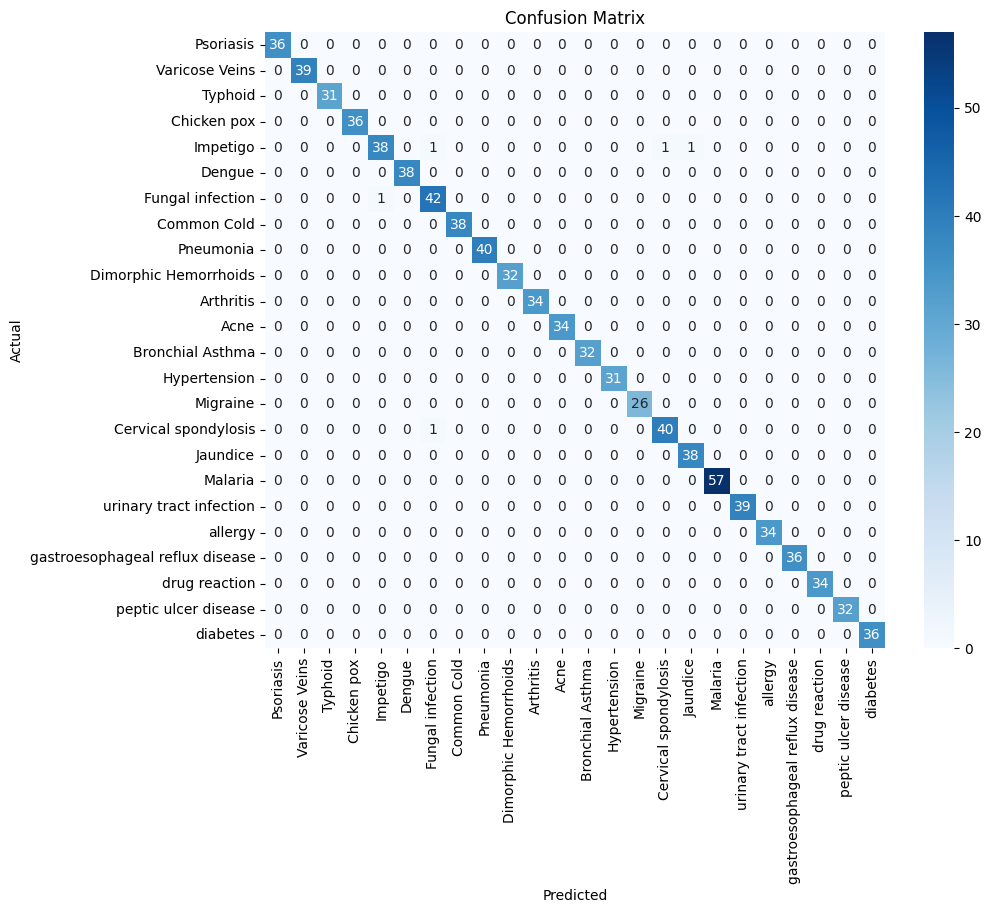

In [ ]:
# Confusion Matrix Visualization (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"The Accuracy = {accuracy_score(y_test, test_predictions)*100:.2f} %")

The Accuracy = 99.43 %


In [ ]:
print(classification_report(y_test, test_predictions))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        36
                      Arthritis       1.00      1.00      1.00        39
               Bronchial Asthma       1.00      1.00      1.00        31
           Cervical spondylosis       1.00      1.00      1.00        36
                    Chicken pox       0.97      0.93      0.95        41
                    Common Cold       1.00      1.00      1.00        38
                         Dengue       0.95      0.98      0.97        43
          Dimorphic Hemorrhoids       1.00      1.00      1.00        38
               Fungal infection       1.00      1.00      1.00        40
                   Hypertension       1.00      1.00      1.00        32
                       Impetigo       1.00      1.00      1.00        34
                       Jaundice       1.00      1.00      1.00        34
                        Malaria       1.00      1.

In [ ]:
# Create an empty list to store the comparison results
comparison_results = []

# Comparison between predicted and true labels
for pred, true in zip(test_predictions, y_test):
    comparison_results.append({'Predicted': pred, 'True': true})

# Print the comparison results in dictionary form
for result in comparison_results:
    print(result)

{'Predicted': 'drug reaction', 'True': 'drug reaction'}
{'Predicted': 'Typhoid', 'True': 'Typhoid'}
{'Predicted': 'urinary tract infection', 'True': 'urinary tract infection'}
{'Predicted': 'Impetigo', 'True': 'Impetigo'}
{'Predicted': 'Dengue', 'True': 'Dengue'}
{'Predicted': 'Common Cold', 'True': 'Common Cold'}
{'Predicted': 'peptic ulcer disease', 'True': 'peptic ulcer disease'}
{'Predicted': 'Hypertension', 'True': 'Hypertension'}
{'Predicted': 'Pneumonia', 'True': 'Pneumonia'}
{'Predicted': 'Pneumonia', 'True': 'Pneumonia'}
{'Predicted': 'Dengue', 'True': 'Dengue'}
{'Predicted': 'Pneumonia', 'True': 'Pneumonia'}
{'Predicted': 'Migraine', 'True': 'Migraine'}
{'Predicted': 'diabetes', 'True': 'diabetes'}
{'Predicted': 'Varicose Veins', 'True': 'Varicose Veins'}
{'Predicted': 'peptic ulcer disease', 'True': 'peptic ulcer disease'}
{'Predicted': 'Dengue', 'True': 'Dengue'}
{'Predicted': 'Dimorphic Hemorrhoids', 'True': 'Dimorphic Hemorrhoids'}
{'Predicted': 'Common Cold', 'True': 'Co

## **Model Validation**

In [ ]:
# Validation Test #

text_before = "The curious cat chased the elusive shadow through the moonlit garden."

# Cleaning
text_after = preprocess_text(text_before)

print(text_before)
print(text_after)

# Vectorization
tfidf_vectorizer

text_after = tfidf_vectorizer.transform([text_after]).toarray()

print(text_after.reshape(-1,1))

# Prediction
disease = best_svm_classifier.predict(text_after)
print(disease)

disease_proba = best_svm_classifier.predict_proba(text_after)
print(disease_proba)

score = disease_proba[0][np.argmax(np.array(disease_proba[0]),axis=0)]
print(score)

if score > 0.30:
    print(disease) # disease
else:
    print("Please enter valid symptoms") # error message

The curious cat chased the elusive shadow through the moonlit garden.
curious cat chased elusive shadow moonlit garden
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
['diabetes']
[[0.00303707 0.00359442 0.01082831 0.00410722 0.06362164 0.01224696
  0.04066682 0.00384638 0.00927622 0.01844921 0.02907725 0.0025507
  0.00408447 0.01685776 0.00584279 0.13185572 0.08373248 0.03601206
  0.02662667 0.17480667 0.14574545 0.01394324 0.11360237 0.0455881 ]]
0.17480667125798208
Please enter valid symptoms


# **KNeighborsClassifier**
In the k-NN algorithm, the "k" represents the number of nearest neighbors considered for making predictions.


## **Applying Grid Search to find the best model version and the best hyperparameters**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a K-Neighbors Classifier object
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values to search
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator = knn_classifier,
                           param_grid = parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# Fit the Grid Search to the train data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

# Get the best model version
best_knn_classifier = grid_search.best_estimator_
print(best_knn_classifier)

# Print the best accuracy found
best_accuracy = grid_search.best_score_
print(f'Best Accuracy: {best_accuracy*100:.2f} %')


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, weights='distance')
Best Accuracy: 96.92 %


In [ ]:
best_knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

## **Model Evaluation**

In [ ]:
# Calculate and Compare the Score of train data and test data

train_score = best_knn_classifier.score(X_train, y_train)
test_score = best_knn_classifier.score(X_test, y_test)

# Print the scores
print(f'Training Score: {train_score*100:.2f} %')
print(f'Testing Score: {test_score*100:.2f} %')


Training Score: 100.00 %
Testing Score: 97.84 %


In [ ]:
# Make Predictions on the train data and test data

train_predictions = best_knn_classifier.predict(X_train)
test_predictions = best_knn_classifier.predict(X_test)

In [ ]:
# Calculate and Compare the Accuracy for training and testing data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print(f'Training Accuracy: {train_accuracy*100:.2f} %')
print(f'Testing Accuracy: {test_accuracy*100:.2f} %')


Training Accuracy: 100.00 %
Testing Accuracy: 97.84 %


In [ ]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_4 = confusion_matrix(y_test, test_predictions)

# Print the Confusion Matrix
print(cm_4)

[[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  2  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 38  0  1  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

In [ ]:
print(f"The Accuracy = {accuracy_score(y_test, test_predictions)*100:.2f} %")

The Accuracy = 97.84 %


In [ ]:
print(classification_report(y_test, test_predictions))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        36
                      Arthritis       1.00      1.00      1.00        39
               Bronchial Asthma       1.00      1.00      1.00        31
           Cervical spondylosis       0.97      1.00      0.99        36
                    Chicken pox       0.92      0.85      0.89        41
                    Common Cold       1.00      1.00      1.00        38
                         Dengue       0.90      0.88      0.89        43
          Dimorphic Hemorrhoids       1.00      1.00      1.00        38
               Fungal infection       0.98      1.00      0.99        40
                   Hypertension       1.00      0.97      0.98        32
                       Impetigo       1.00      1.00      1.00        34
                       Jaundice       1.00      1.00      1.00        34
                        Malaria       0.97      1.

## **Model Validation**

In [ ]:
# Validation Test #

# text_before = "The skin around my mouth, nose, and eyes is ruddy and kindled. It is regularly bothersome and awkward. There's a recognizable aggravation in my nails."

text_before = "The abdominal pain has been coming and going, and it's been really unpleasant. It's been accompanied by constipation and vomiting. I feel really concerned about my health."

# Cleaning
text_after = preprocess_text(text_before)

print(text_before)
print(text_after)

# Vectorization
tfidf_vectorizer

text_after = tfidf_vectorizer.transform([text_after]).toarray()

print(text_after.reshape(-1,1))

# Prediction
disease = best_knn_classifier.predict(text_after)

print(disease)

The abdominal pain has been coming and going, and it's been really unpleasant. It's been accompanied by constipation and vomiting. I feel really concerned about my health.
abdominal pain coming going really unpleasant accompanied constipation vomiting feel really concerned health
[[0.        ]
 [0.30370294]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
['Typhoid']
